# Car Prices

In [2]:
import pandas as pd
df = pd.read_csv("/data/notebook_files/carprice.csv") # Adathalmaz beolvasása
df.drop('normalized-losses', axis=1, inplace=True) # Szükségtelen oszlop eldobása
df

symboling 
 make 
 fuel-type 
 aspiration 
 num-of-doors 
 body-style 
 drive-wheels 
 engine-location 
 wheel-base 
 length 
 ... 
 engine-size 
 fuel-system 
 bore 
 stroke 
 compression-ratio 
 horsepower 
 peak-rpm 
 city-mpg 
 highway-mpg 
 price 
 
 
 
 
 0 
 3 
 alfa-romero 
 gas 
 std 
 two 
 convertible 
 rwd 
 front 
 88.6 
 168.8 
 ... 
 130 
 mpfi 
 3.47 
 2.68 
 9.0 
 111 
 5000 
 21 
 27 
 13495 
 
 
 1 
 3 
 alfa-romero 
 gas 
 std 
 two 
 convertible 
 rwd 
 front 
 88.6 
 168.8 
 ... 
 130 
 mpfi 
 3.47 
 2.68 
 9.0 
 111 
 5000 
 21 
 27 
 16500 
 
 
 2 
 1 
 alfa-romero 
 gas 
 std 
 two 
 hatchback 
 rwd 
 front 
 94.5 
 171.2 
 ... 
 152 
 mpfi 
 2.68 
 3.47 
 9.0 
 154 
 5000 
 19 
 26 
 16500 
 
 
 3 
 2 
 audi 
 gas 
 std 
 four 
 sedan 
 fwd 
 front 
 99.8 
 176.6 
 ... 
 109 
 mpfi 
 3.19 
 3.40 
 10.0 
 102 
 5500 
 24 
 30 
 13950 
 
 
 4 
 2 
 audi 
 gas 
 std 
 four 
 sedan 
 4wd 
 front 
 99.4 
 176.6 
 ... 
 136 
 mpfi 
 3.19 
 3.40 
 8.0 
 115 
 5500 
 18 
 22 
 17450 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 194 
 -1 
 volvo 
 gas 
 std 
 four 
 sedan 
 rwd 
 front 
 109.1 
 188.8 
 ... 
 141 
 mpfi 
 3.78 
 3.15 
 9.5 
 114 
 5400 
 23 
 28 
 16845 
 
 
 195 
 -1 
 volvo 
 gas 
 turbo 
 four 
 sedan 
 rwd 
 front 
 109.1 
 188.8 
 ... 
 141 
 mpfi 
 3.78 
 3.15 
 8.7 
 160 
 5300 
 19 
 25 
 19045 
 
 
 196 
 -1 
 volvo 
 gas 
 std 
 four 
 sedan 
 rwd 
 front 
 109.1 
 188.8 
 ... 
 173 
 mpfi 
 3.58 
 2.87 
 8.8 
 134 
 5500 
 18 
 23 
 21485 
 
 
 197 
 -1 
 volvo 
 diesel 
 turbo 
 four 
 sedan 
 rwd 
 front 
 109.1 
 188.8 
 ... 
 145 
 idi 
 3.01 
 3.40 
 23.0 
 106 
 4800 
 26 
 27 
 22470 
 
 
 198 
 -1 
 volvo 
 gas 
 turbo 
 four 
 sedan 
 rwd 
 front 
 109.1 
 188.8 
 ... 
 141 
 mpfi 
 3.78 
 3.15 
 9.5 
 114 
 5400 
 19 
 25 
 22625 
 
 
 
 199 rows × 25 columns

In [3]:
df = df.drop(df.loc[df['price'] == '?'].index) # Azon rekordok eldobása ahol nincs ár megadva

# Oszlop típusok megadása
cat = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
df[cat] = df[cat].astype('category')
df['price'] = df['price'].astype(int)

df['price'].astype('int')
df['horsepower'].astype('int')

df.dtypes

symboling int64
make category
fuel-type category
aspiration category
num-of-doors category
body-style category
drive-wheels category
engine-location category
wheel-base float64
length float64
width float64
height float64
curb-weight int64
engine-type category
num-of-cylinders category
engine-size int64
fuel-system category
bore float64
stroke float64
compression-ratio float64
horsepower int64
peak-rpm int64
city-mpg int64
highway-mpg int64
price int64
dtype: object

<AxesSubplot:xlabel='horsepower', ylabel='price'>

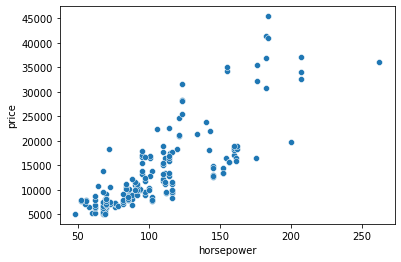

In [4]:
import seaborn as sns
sns.scatterplot(data=df, x='horsepower', y='price') # Teljesítmény és ár összefüggése

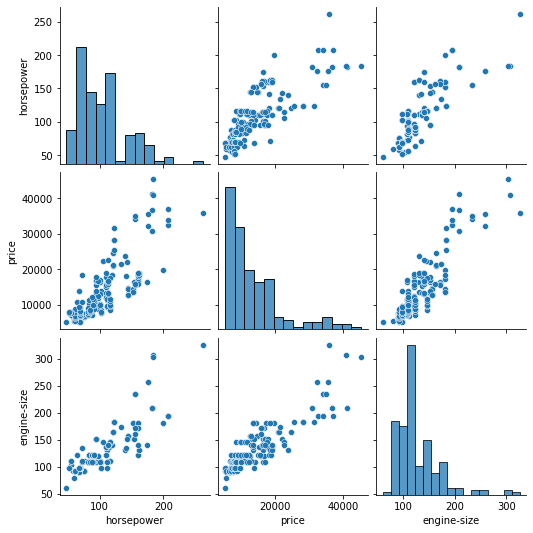

In [5]:
preprocessed_df = pd.get_dummies(df) # A kategória típusok bináris változókká alakítása
sns.pairplot( # Teljesítmény, ár és motorméret grafikonjai
    preprocessed_df[[preprocessed_df.columns[10], 
                     preprocessed_df.columns[14], 
                     preprocessed_df.columns[6]]])

In [6]:
# Keletkezett oszlopok
for i, column in enumerate(preprocessed_df.columns):
    print(f"{i}. {column}")

0. symboling
1. wheel-base
2. length
3. width
4. height
5. curb-weight
6. engine-size
7. bore
8. stroke
9. compression-ratio
10. horsepower
11. peak-rpm
12. city-mpg
13. highway-mpg
14. price
15. make_alfa-romero
16. make_audi
17. make_bmw
18. make_chevrolet
19. make_dodge
20. make_honda
21. make_isuzu
22. make_jaguar
23. make_mazda
24. make_mercedes-benz
25. make_mercury
26. make_mitsubishi
27. make_nissan
28. make_peugot
29. make_plymouth
30. make_porsche
31. make_saab
32. make_subaru
33. make_toyota
34. make_volkswagen
35. make_volvo
36. fuel-type_diesel
37. fuel-type_gas
38. aspiration_std
39. aspiration_turbo
40. num-of-doors_?
41. num-of-doors_four
42. num-of-doors_two
43. body-style_convertible
44. body-style_hardtop
45. body-style_hatchback
46. body-style_sedan
47. body-style_wagon
48. drive-wheels_4wd
49. drive-wheels_fwd
50. drive-wheels_rwd
51. engine-location_front
52. engine-location_rear
53. engine-type_dohc
54. engine-type_l
55. engine-type_ohc
56. engine-type_ohcf
57. e

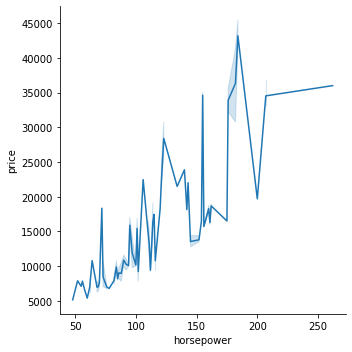

In [7]:
# Ár és teljesítmény összefüggése vonalgrafikonon
sns.relplot(data=df, x='horsepower', y='price', kind='line')

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[[ 1.         -0.53556523 -0.36306289]
 [-0.53556523  1.          0.87922185]
 [-0.36306289  0.87922185  1.        ]]
(71, 71)


<AxesSubplot:>

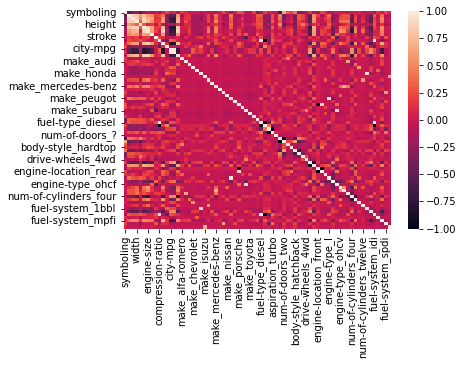

In [8]:
# Oszlopok korrelációjának bárázolása heatmappel
hm = preprocessed_df.corr()
print(type(hm))
hm_as_array = hm.to_numpy()
print(type(hm_as_array))
print(hm_as_array[0:3, 0:3])
print(hm_as_array.shape)
sns.heatmap(hm)

In [9]:
# Tanító és tesztelő adathalmazok kialakítása
from sklearn.model_selection import train_test_split

print(preprocessed_df.shape)
train, test = train_test_split(preprocessed_df, random_state=0, train_size=0.8)
train.shape, test.shape, type(train), type(test)

(195, 71)


((156, 71), (39, 71), pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [10]:
print(train.shape)
X_train = train[train.columns.difference(['price'])].copy()
y_train = train['price']
X_test = test[test.columns.difference(['price'])].copy()
y_test = test['price']

X_train2 = train[train.columns.difference(['price'])].copy()
X_test2 = test[test.columns.difference(['price'])].copy()

X_train.loc[:, 'intercept'] = 1
X_test.loc[:, 'intercept'] = 1
X_train2.loc[:, 'intercept'] = 1
X_test2.loc[:, 'intercept'] = 1
print(X_train.shape)
X_test.iloc[0:3, :]

(156, 71)
(156, 71)


aspiration_std 
 aspiration_turbo 
 body-style_convertible 
 body-style_hardtop 
 body-style_hatchback 
 body-style_sedan 
 body-style_wagon 
 bore 
 city-mpg 
 compression-ratio 
 ... 
 num-of-cylinders_twelve 
 num-of-doors_? 
 num-of-doors_four 
 num-of-doors_two 
 peak-rpm 
 stroke 
 symboling 
 wheel-base 
 width 
 intercept 
 
 
 
 
 86 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 2.99 
 45 
 21.9 
 ... 
 0 
 0 
 0 
 1 
 4800 
 3.47 
 1 
 94.5 
 63.8 
 1 
 
 
 13 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 3.31 
 21 
 9.0 
 ... 
 0 
 0 
 1 
 0 
 4250 
 3.19 
 0 
 101.2 
 64.8 
 1 
 
 
 34 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 2.91 
 30 
 9.2 
 ... 
 0 
 0 
 0 
 1 
 6000 
 3.41 
 1 
 93.7 
 64.0 
 1 
 
 
 
 3 rows × 71 columns

In [11]:
# Model betanítása
import statsmodels.api as sm
import numpy as np

lr_model = sm.OLS(y_train, X_train)
model = lr_model.fit()

model2 = sm.OLS(y_train, X_train2).fit() 


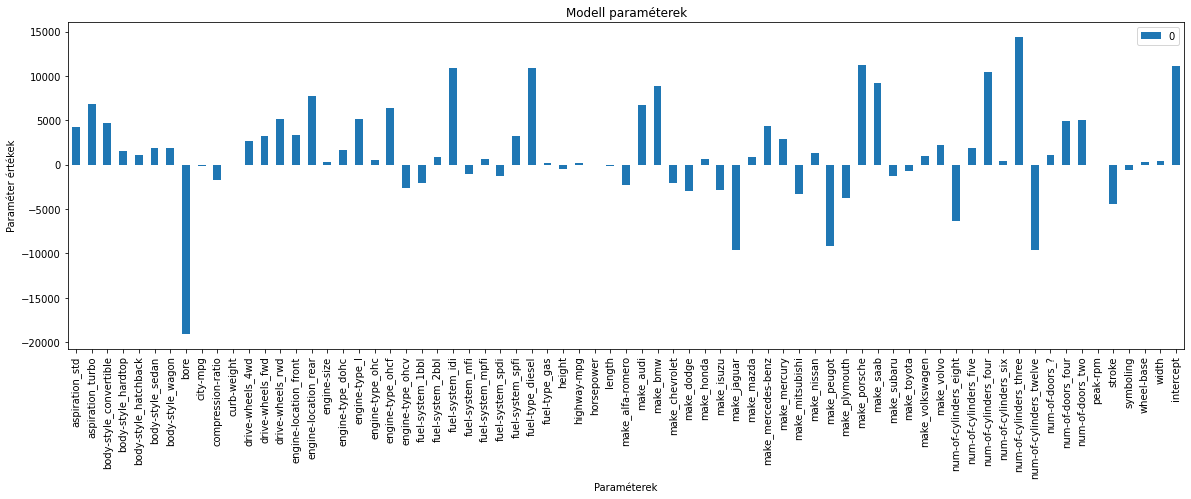

In [12]:
# Modell paramétereinek ábrázolása
import matplotlib.pyplot as plt

params_df = model.params.to_frame()
fig, ax = plt.subplots(figsize=(20, 6))
params_df.plot(kind='bar', ax=ax)
plt.xlabel('Paraméterek')
plt.ylabel('Paraméter értékek')
plt.title('Modell paraméterek')
plt.show()

In [13]:
print(X_test.iloc[0])
first_instance = np.array(X_test.iloc[0])  # Eredeti érték vektorrá alakítva

aspiration_std             1.00
aspiration_turbo           0.00
body-style_convertible     0.00
body-style_hardtop         0.00
body-style_hatchback       0.00
                          ...  
stroke                     3.47
symboling                  1.00
wheel-base                94.50
width                     63.80
intercept                  1.00
Name: 86, Length: 71, dtype: float64


In [52]:
print("Predikció: {:.4f}".format(model.predict(first_instance)[0]))
prediction = first_instance @ model.params # a preidkció tulajdonképp egy pontszorzat
print('A predikció (pontszorzat segítségével kiszámolva): {:.4f}'.format(prediction))
print("Elvárt érték: {:.4f}".format(y_test.iloc[0]))

Predikció: 10726.2704
A predikció (pontszorzat segítségével kiszámolva): 10726.2704
Elvárt érték: 7099.0000


In [56]:
print(first_instance)
pred_original = model.predict(first_instance)[0]
print("Eredeti predikció: {:.4f}".format(pred_original))
first_instance_copy = first_instance.copy()
first_instance_copy[33] += 0.1
print(first_instance_copy)
pred_new = model.predict(first_instance_copy)[0]
print("Új predikció: {:.4f}".format(pred_new))
print("Különbség: {:.4f}".format(pred_new - pred_original))
hp_weight = model.params['horsepower']
print("A lóerő jellemző súlya: {:.4f}".format(hp_weight))

[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
 2.990e+00 4.500e+01 2.190e+01 2.017e+03 0.000e+00 1.000e+00 0.000e+00
 1.000e+00 0.000e+00 1.030e+02 0.000e+00 0.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00 0.000e+00 5.450e+01 5.000e+01 5.500e+01 1.653e+02
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00 4.800e+03 3.470e+00 1.000e+00 9.450e+01 6.380e+01
 1.000e+00]
Eredeti predikció: 10726.2704
[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
 2.990e+00 4.500e+01 2.190e+01 2.017e+03 0.000e+00 1.000e+00 0.000e+00
 1.000e+00 0.000e+00 1.030e+02 0.000e+00 0.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.00

In [16]:
model.summary(alpha=0.05)

OLS Regression Results 
 
 Dep. Variable: price R-squared: 0.971 
 
 
 Model: OLS Adj. R-squared: 0.955 
 
 
 Method: Least Squares F-statistic: 59.23 
 
 
 Date: Wed, 24 May 2023 Prob (F-statistic): 1.22e-56 
 
 
 Time: 19:07:55 Log-Likelihood: -1345.6 
 
 
 No. Observations: 156 AIC: 2805. 
 
 
 Df Residuals: 99 BIC: 2979. 
 
 
 Df Model: 56 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 aspiration_std 4239.5183 2939.744 1.442 0.152 -1593.572 1.01e+04 
 
 
 aspiration_turbo 6882.4052 2814.962 2.445 0.016 1296.910 1.25e+04 
 
 
 body-style_convertible 4725.6976 1402.647 3.369 0.001 1942.542 7508.853 
 
 
 body-style_hardtop 1495.4594 1327.173 1.127 0.263 -1137.940 4128.859 
 
 
 body-style_hatchback 1093.2106 1219.111 0.897 0.372 -1325.771 3512.192 
 
 
 body-style_sedan 1898.2884 1263.616 1.502 0.136 -609.000 4405.577 
 
 
 body-style_wagon 1909.2675 1389.543 1.374 0.173 -847.888 4666.423 
 
 
 bore -1.905e+04 4031.342 -4.726 0.000 -2.71e+04 -1.11e+04 
 
 
 city-mpg -136.1428 145.635 -0.935 0.352 -425.115 152.829 
 
 
 compression-ratio -1703.3878 631.631 -2.697 0.008 -2956.681 -450.095 
 
 
 curb-weight 6.8509 1.714 3.997 0.000 3.450 10.252 
 
 
 drive-wheels_4wd 2680.7224 1997.156 1.342 0.183 -1282.068 6643.513 
 
 
 drive-wheels_fwd 3278.2942 1959.103 1.673 0.097 -608.992 7165.580 
 
 
 drive-wheels_rwd 5162.9069 2063.916 2.502 0.014 1067.650 9258.164 
 
 
 engine-location_front 3399.5119 3621.822 0.939 0.350 -3786.969 1.06e+04 
 
 
 engine-location_rear 7722.4116 2493.824 3.097 0.003 2774.124 1.27e+04 
 
 
 engine-size 276.8221 45.218 6.122 0.000 187.100 366.544 
 
 
 engine-type_dohc 1645.9451 1368.595 1.203 0.232 -1069.644 4361.534 
 
 
 engine-type_l 5190.5633 1732.843 2.995 0.003 1752.227 8628.900 
 
 
 engine-type_ohc 479.6510 1185.208 0.405 0.687 -1872.059 2831.361 
 
 
 engine-type_ohcf 6425.4964 1964.455 3.271 0.001 2527.591 1.03e+04 
 
 
 engine-type_ohcv -2619.7322 1323.351 -1.980 0.051 -5245.548 6.083 
 
 
 fuel-system_1bbl -2046.1520 1555.309 -1.316 0.191 -5132.223 1039.919 
 
 
 fuel-system_2bbl 828.8351 857.856 0.966 0.336 -873.337 2531.007 
 
 
 fuel-system_idi 1.091e+04 3739.171 2.919 0.004 3493.701 1.83e+04 
 
 
 fuel-system_mfi -1039.6943 2034.298 -0.511 0.610 -5076.182 2996.794 
 
 
 fuel-system_mpfi 609.1563 932.230 0.653 0.515 -1240.589 2458.902 
 
 
 fuel-system_spdi -1323.4747 1223.175 -1.082 0.282 -3750.520 1103.571 
 
 
 fuel-system_spfi 3180.2261 2457.900 1.294 0.199 -1696.780 8057.232 
 
 
 fuel-type_diesel 1.091e+04 3739.171 2.919 0.004 3493.701 1.83e+04 
 
 
 fuel-type_gas 208.8966 3972.418 0.053 0.958 -7673.242 8091.036 
 
 
 height -469.5956 161.403 -2.909 0.004 -789.854 -149.337 
 
 
 highway-mpg 201.8077 125.523 1.608 0.111 -47.257 450.873 
 
 
 horsepower -49.2507 28.222 -1.745 0.084 -105.250 6.749 
 
 
 length -130.9653 54.557 -2.401 0.018 -239.218 -22.712 
 
 
 make_alfa-romero -2323.0735 1865.331 -1.245 0.216 -6024.294 1378.147 
 
 
 make_audi 6690.0204 1968.270 3.399 0.001 2784.546 1.06e+04 
 
 
 make_bmw 8904.8254 1629.259 5.466 0.000 5672.023 1.21e+04 
 
 
 make_chevrolet -2030.3116 1877.023 -1.082 0.282 -5754.732 1694.109 
 
 
 make_dodge -2992.9141 1001.012 -2.990 0.004 -4979.138 -1006.690 
 
 
 make_honda 598.1447 1481.238 0.404 0.687 -2340.954 3537.243 
 
 
 make_isuzu -2837.9340 2015.244 -1.408 0.162 -6836.616 1160.748 
 
 
 make_jaguar -9590.9977 3156.088 -3.039 0.003 -1.59e+04 -3328.634 
 
 
 make_mazda 822.3783 898.744 0.915 0.362 -960.924 2605.681 
 
 
 make_mercedes-benz 4329.3085 2476.815 1.748 0.084 -585.230 9243.847 
 
 
 make_mercury 2930.3914 2406.990 1.217 0.226 -1845.598 7706.381 
 
 
 make_mitsubishi -3342.3626 1000.676 -3.340 0.001 -5327.921 -1356.804 
 
 
 make_nissan 1276.5614 924.914 1.380 0.171 -558.669 3111.792 
 
 
 make_peugot -9175.1983 1978.563 -4.637 0.000 -1.31e+04 -5249.301 
 
 
 make_plymouth -3760.3477 981.456 -3.831 0.000 -5707.768 -1812.927 
 
 
 make_porsche 1.127e+04 2487.972 4.531 0.000 6336.093 1.62e+04 
 


Text(0, 0.5, 'Becsült érték')

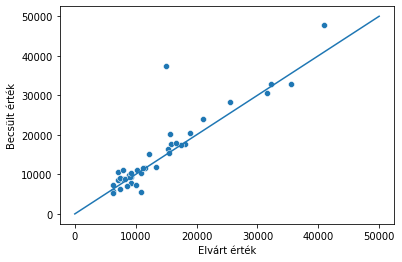

In [17]:
# Becsült és elvárt értékek összehasonlítása
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Kiugró érték
# y_test = y_test.drop(128)
# y_pred = y_pred.drop(128)

ax = sns.scatterplot(x=y_test, y=y_pred)
ax.plot([0,50000], [0, 50000])
plt.xlabel('Elvárt érték')
plt.ylabel('Becsült érték')

In [18]:
# Különbségek meghatározása
comparison_df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
comparison_df['difference'] = comparison_df['y_test'] - comparison_df['y_pred']
comparison_df_sorted = comparison_df.sort_values('difference', ascending=False)
print(comparison_df_sorted)
sorted_prices = comparison_df_sorted['y_test']
print('------------')
print(sorted_prices)

           y_pred  y_test    difference
59    5549.630426   10795   5245.369574
182   7197.176516    9995   2797.823484
48   32967.086361   35550   2582.913639
185  11817.091812   13295   1477.908188
77    7021.706877    8499   1477.293123
138   7784.387237    9233   1448.612763
92    6279.405538    7499   1219.594462
66   30678.845702   31600    921.154298
19    5413.297514    6295    881.702486
116   5709.803191    6229    519.196809
170  10415.990530   10898    482.009470
113  17727.032957   18150    422.967043
159   9238.729624    9298     59.270376
129  15490.540113   15510     19.459887
165  11559.863771   11549    -10.863771
4    17496.320851   17450    -46.320851
38    9448.493938    9095   -353.493938
164  11722.332576   11199   -523.332576
179   8779.419154    8195   -584.419154
47   32967.086361   32250   -717.086361
58   11002.254079   10245   -757.254079
177   8913.652318    7975   -938.652318
145   7323.534132    6338   -985.534132
167   9944.444738    8948   -996.444738


In [19]:
# Hibák kiszámolása
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 2174.8119508785326
Mean Squared Error (MSE): 17536701.654944304
Root Mean Squared Error (RMSE): 4187.684521898027


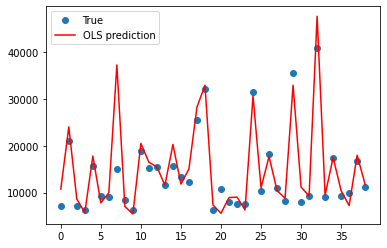

In [20]:
# Hibák ábrázolása
fig, ax = plt.subplots()

# results.predict(X_train)
x = np.arange(len(X_test))

ax.plot(x, y_test, "o", label="True")
ax.plot(x, model.predict(X_test), "r", label="OLS prediction")

ax.legend(loc="best")

In [21]:
# R2 pontszám meghatározása
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7529122158446286

In [22]:
# R2 pontszám meghatározása manuálisan
SSE = np.sum((y_test - y_pred)**2)
SST = np.sum((y_test - np.mean(y_test))**2)
print("SSE: {:.3f}\nSST: {:.3f}".format(SSE, SST))
print("Az R^2 mutató: {:.4f}".format(1- SSE / SST))

SSE: 683931364.543
SST: 2767969152.667
Az R^2 mutató: 0.7529


In [23]:
# T-statisztika meghatározása
print('A lóerő (horsepower) változóhoz tartozó t-statisztika: {:.3f}'.format(model.tvalues['horsepower']))

A lóerő (horsepower) változóhoz tartozó t-statisztika: -1.745


In [24]:
n = X_train.shape[0]
y_hat = model.predict(X_train)
sse = np.sum((y_train - y_hat)**2)
residuals = np.sum(model.resid**2)
sse2 = model.ssr # a statsmodels ssr-ként hivatkozik az sse-re
print("SSE értéke: {:.4f}\nSSE értéke másképp: {:.4f}\nSSE értéke még egyféleképp: {:.4f}".format(sse, residuals, sse2))
s2 = sse / (n - model.df_model - 1)
sigma = s2 * np.linalg.pinv(X_train.T @ X_train)
SEs = np.sqrt(np.diag(sigma))
#print(SEs)

t_statistics = model.params / SEs
print('A lóerő (horsepower) változóhoz tartozó t-statisztika: {:.3f}'.format(model.tvalues['horsepower']))
print('A lóerő (horsepower) változóhoz tartozó t-statisztika, ahogy mi számoltuk: {:.3f}'.format(t_statistics['horsepower']))

SSE értéke: 283541432.8262
SSE értéke másképp: 283541432.8262
SSE értéke még egyféleképp: 283541432.8262
A lóerő (horsepower) változóhoz tartozó t-statisztika: -1.745
A lóerő (horsepower) változóhoz tartozó t-statisztika, ahogy mi számoltuk: -1.745


In [25]:
def summary2pandas(summary):
    """
    statsmodels Summary objektumából, Pandas DataFrame-ként kiextraktálja a statisztikai információkat
    """
    results_as_html = summary.tables[1].as_html()
    return pd.read_html(results_as_html, header=0, index_col=0)[0]

def feature_importance(summary):
    df = summary2pandas(summary)

    return pd.DataFrame(data={
        "features": df.index,
        "standard error": df['std err'],
        "beta hat": df['coef'],
        "t statistics": df['t'],
        "feature importance": np.abs(df['t'])
    })

In [26]:
statistics = feature_importance(model.summary())
statistics

features 
 standard error 
 beta hat 
 t statistics 
 feature importance 
 
 
 
 
 aspiration_std 
 aspiration_std 
 2939.744 
 4239.5183 
 1.442 
 1.442 
 
 
 aspiration_turbo 
 aspiration_turbo 
 2814.962 
 6882.4052 
 2.445 
 2.445 
 
 
 body-style_convertible 
 body-style_convertible 
 1402.647 
 4725.6976 
 3.369 
 3.369 
 
 
 body-style_hardtop 
 body-style_hardtop 
 1327.173 
 1495.4594 
 1.127 
 1.127 
 
 
 body-style_hatchback 
 body-style_hatchback 
 1219.111 
 1093.2106 
 0.897 
 0.897 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 stroke 
 stroke 
 1397.981 
 -4422.0004 
 -3.163 
 3.163 
 
 
 symboling 
 symboling 
 294.290 
 -651.4299 
 -2.214 
 2.214 
 
 
 wheel-base 
 wheel-base 
 105.305 
 270.7412 
 2.571 
 2.571 
 
 
 width 
 width 
 298.216 
 406.6865 
 1.364 
 1.364 
 
 
 intercept 
 intercept 
 5681.235 
 11120.0000 
 1.958 
 1.958 
 
 
 
 71 rows × 5 columns

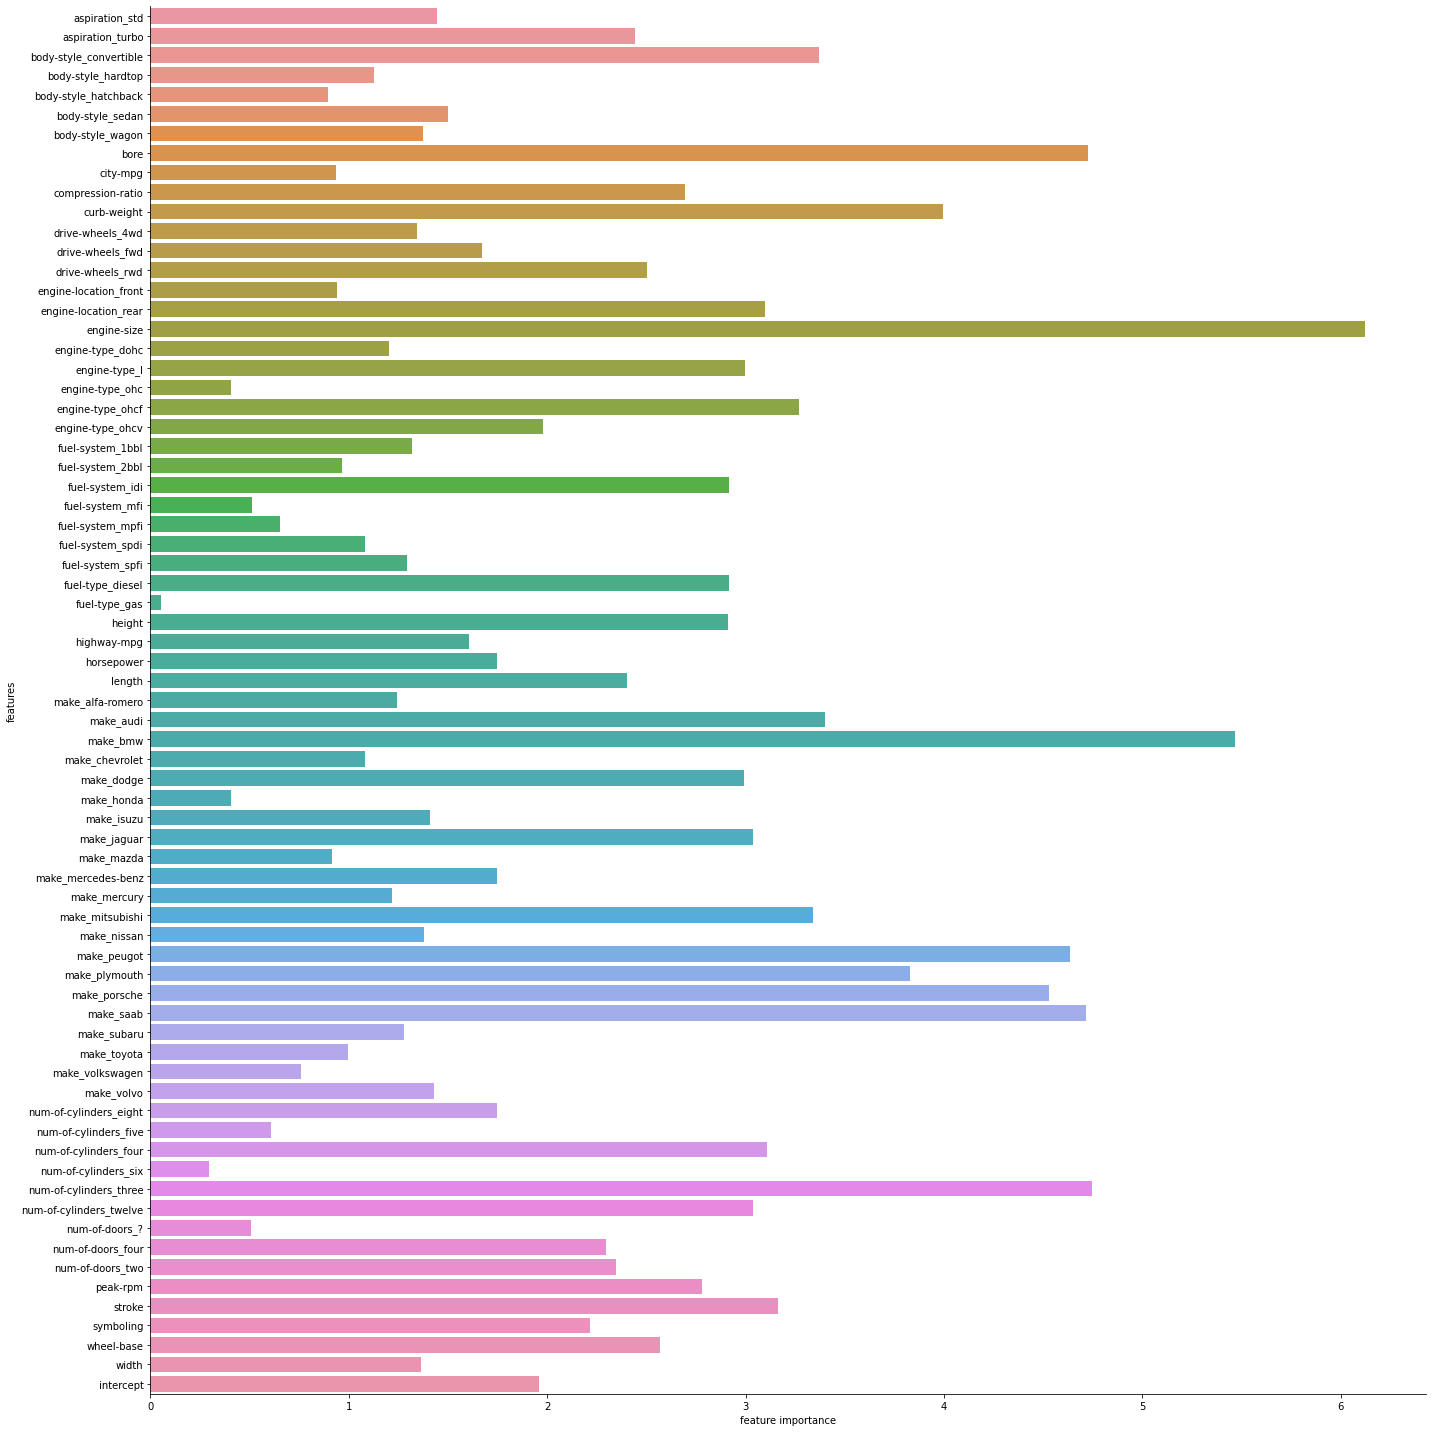

In [27]:
# Az egyes feature-ök jelentőségének ábrázolása
sns.catplot(kind="bar", data=statistics, x="feature importance", y='features', orient="h", height=20)

<ErrorbarContainer object of 3 artists>

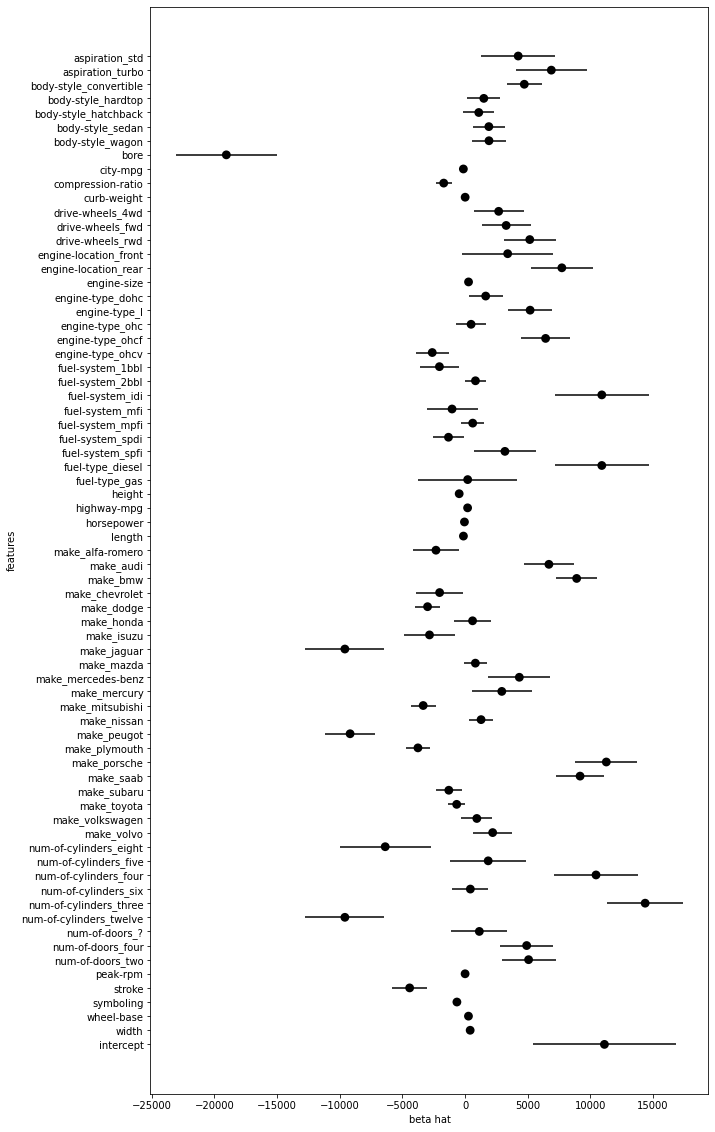

In [28]:
plt.figure(figsize=(10, 20))
sns.pointplot(data=statistics[["features", "beta hat"]], x="beta hat", y="features", orient="h", join=False, color='black')
plt.errorbar(y=np.arange(len(statistics)),x=statistics["beta hat"], xerr=statistics["standard error"], fmt='none', c='black')

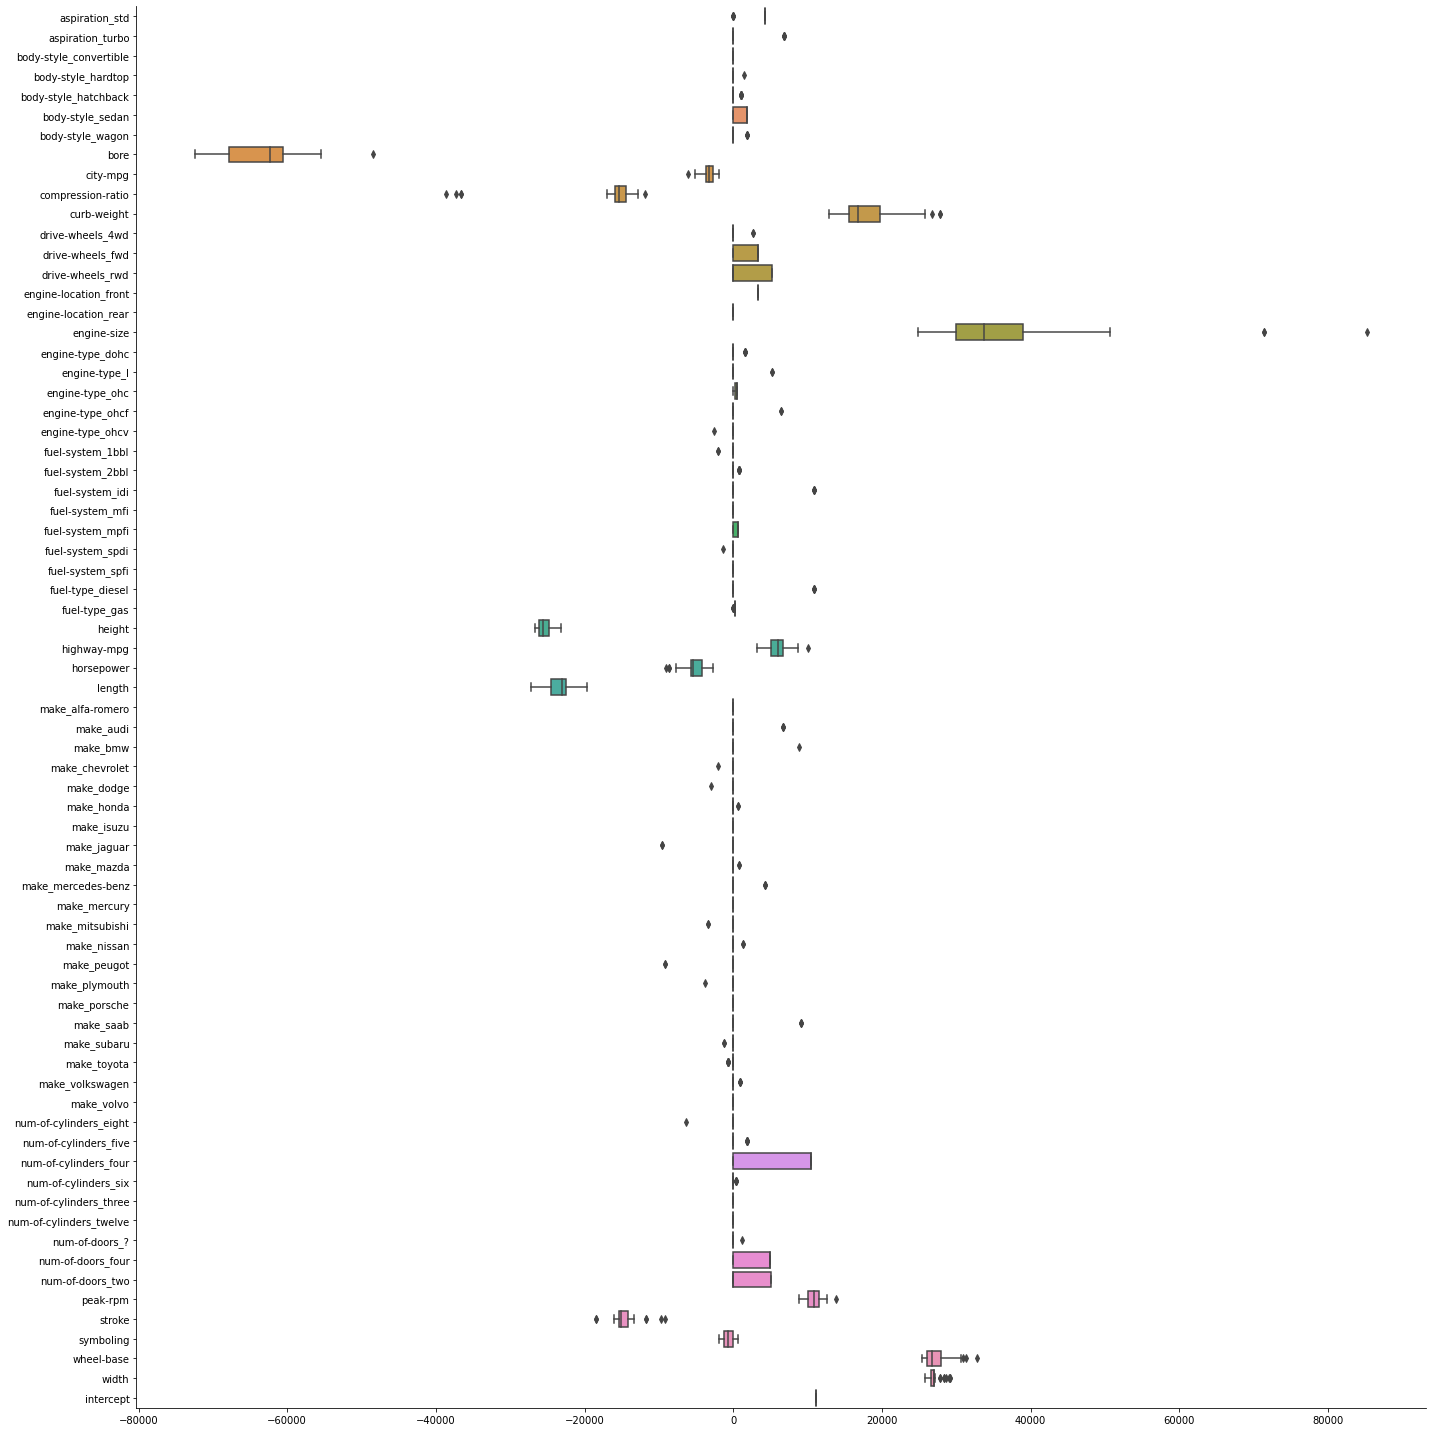

In [29]:
effect = X_test * model.params
sns.catplot(kind="box", data=effect, orient="h", height=20)

In [30]:

# Lasso értékek meghatározása
lasso = sm.OLS(y_train, X_train).fit_regularized(method='elastic_net', L1_wt=1, alpha=8)
lasso.params

aspiration_std 11589.302603
aspiration_turbo 12796.074845
body-style_convertible 2594.481249
body-style_hardtop 441.867026
body-style_hatchback 0.000000
 ... 
stroke 70.818483
symboling -609.689253
wheel-base 6.346131
width 0.000000
intercept -3.541969
Length: 71, dtype: float64

Text(0, 0.5, 'nemnulla regressziós együttható')

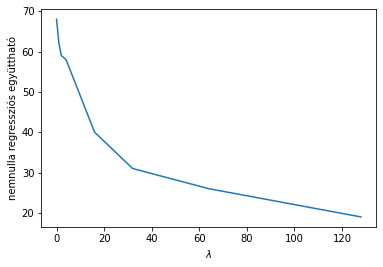

In [31]:
alphas = [0, 1, 2, 4, 8, 16, 32, 64, 128]
nnzs = []

for a in alphas:
  lasso = sm.OLS(y_train, X_train).fit_regularized(method='elastic_net', L1_wt=1, alpha=a)
  nnzs.append((lasso.params != 0).sum())
    
sns.lineplot(x=alphas, y=nnzs)
plt.xlabel('$\lambda$')
plt.ylabel('nemnulla regressziós együttható')

In [32]:
print(lasso.params)

aspiration_std            196.987111
aspiration_turbo            0.000000
body-style_convertible      0.000000
body-style_hardtop          0.000000
body-style_hatchback        0.000000
                             ...    
stroke                      0.000000
symboling                   0.000000
wheel-base                  1.009158
width                       0.000000
intercept                   0.000000
Length: 71, dtype: float64


In [33]:
# DÖNTÉSI FA

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Inicializálás
tree_model = DecisionTreeRegressor()

# Illesztés a tanító adatokra
tree_model.fit(X_train, y_train)
# Predikció a teszt adatokra
y_pred = tree_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('R2: ', r2)

MSE:  5008184.025641026
R2:  0.9294359271266339


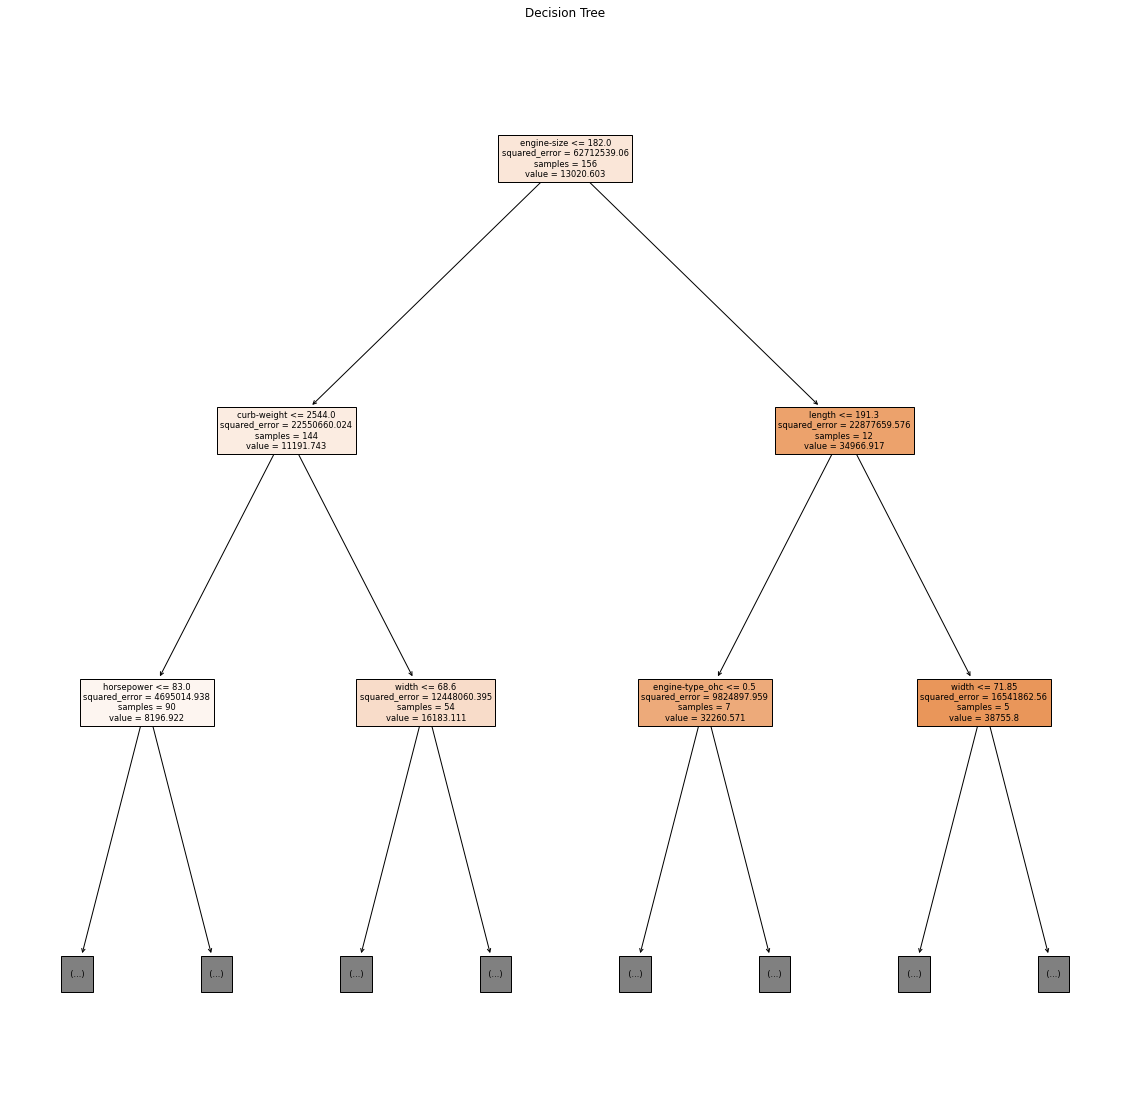

In [35]:
# Döntési fa ábrázolása
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(tree_model, feature_names=X_train.columns, filled=True, max_depth=2)
plt.title("Decision Tree")
plt.show()


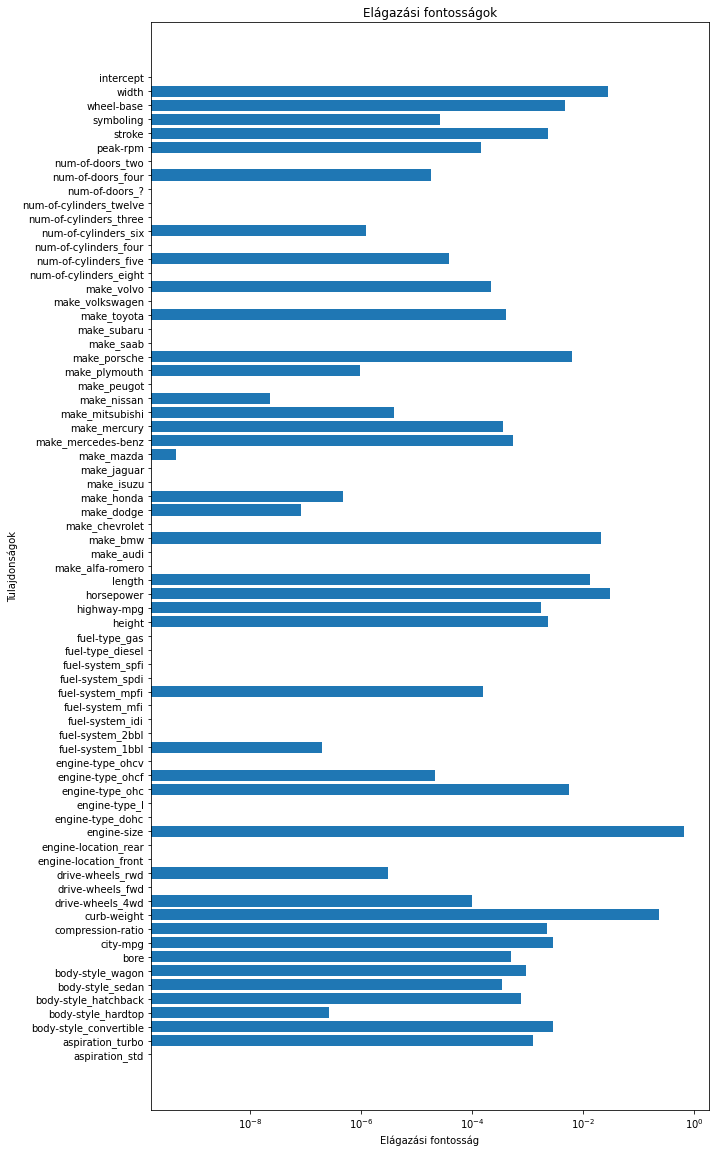

In [36]:
# Jellemzők jelentőségének ábrázolása logaritmukus skálán
import matplotlib.pyplot as plt

feature_importance = tree_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 20))
plt.barh(feature_names, feature_importance)
plt.xscale('log')  # Logaritmikus skála beállítása az X-tengelyen
plt.xlabel('Elágazási fontosság')
plt.ylabel('Tulajdonságok')
plt.title('Elágazási fontosságok')
plt.show()

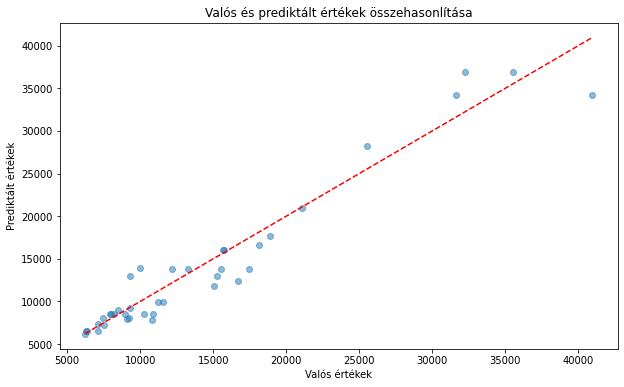

In [37]:
# Elvárt és becsült értékek különbsége
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Valós értékek')
plt.ylabel('Prediktált értékek')
plt.title('Valós és prediktált értékek összehasonlítása')
plt.show()